In [22]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**Note:** This notebook can run using TensorFlow 2.5.0

In [23]:
#!pip install tensorflow==2.5.0

In [24]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
### YOUR CODE HERE
from tensorflow.keras import regularizers
###
import tensorflow.keras.utils as ku 
import numpy as np 

In [25]:
tokenizer = Tokenizer()

# sonnets.txt
!gdown --id 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K

data = open('./sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

Downloading...
From: https://drive.google.com/uc?id=108jAePKK4R3BVYBbYJZ32JWUwxeMg20K
To: /content/sonnets.txt
100% 93.6k/93.6k [00:00<00:00, 75.1MB/s]


In [28]:
### START CODE HERE
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len - 1))
model.add(Bidirectional(LSTM(150, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(100))
model.add(Dense(128, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model.add(Dense(total_words, activation='softmax'))
# Pick an optimizer
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
### END CODE HERE
    
print(model.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, 10, 100)           321100    
                                                                 
 bidirectional_20 (Bidirecti  (None, 10, 300)          301200    
 onal)                                                           
                                                                 
 dropout_10 (Dropout)        (None, 10, 300)           0         
                                                                 
 lstm_21 (LSTM)              (None, 100)               160400    
                                                                 
 dense_15 (Dense)            (None, 128)               12928     
                                                                 
 dense_16 (Dense)            (None, 3211)              414219    
                                                     

In [29]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 20s 22ms/step - loss: 7.0493 - accuracy: 0.0232
Epoch 2/100
484/484 [==============================] - 11s 22ms/step - loss: 6.5111 - accuracy: 0.0211
Epoch 3/100
484/484 [==============================] - 11s 22ms/step - loss: 6.4169 - accuracy: 0.0254
Epoch 4/100
484/484 [==============================] - 11s 22ms/step - loss: 6.3348 - accuracy: 0.0295
Epoch 5/100
484/484 [==============================] - 11s 22ms/step - loss: 6.2650 - accuracy: 0.0351
Epoch 6/100
484/484 [==============================] - 11s 22ms/step - loss: 6.2108 - accuracy: 0.0358
Epoch 7/100
484/484 [==============================] - 11s 22ms/step - loss: 6.1553 - accuracy: 0.0374
Epoch 8/100
484/484 [==============================] - 11s 22ms/step - loss: 6.0912 - accuracy: 0.0407
Epoch 9/100
484/484 [==============================] - 11s 22ms/step - loss: 6.0197 - accuracy: 0.0440
Epoch 10/100
484/484 [==============================] - 11s 22ms/step - l

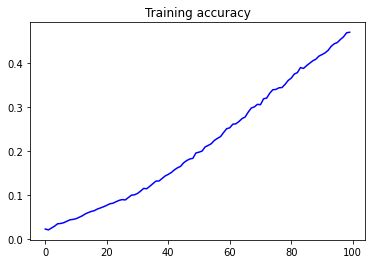

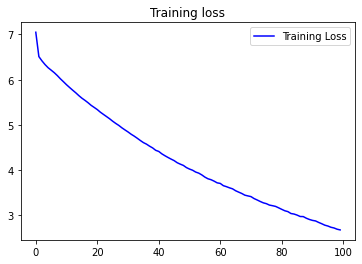

In [30]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [32]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope your memory can shine up my smell on all all gentle something day i be earth disdain new than your song eyes is wrong muse straight up your friend did choose behind of wrinkles every number one part blunter now see lie to thee on move hate far prove crime spend appear lie doth nature grew me skill after loss will now see worth out far as dost die they strong date twain still press lie being i do you see thee one as thine eye on my lovers express'd used ' lies purge arise ill reign wealth on thee
